# Context
This notebook drives the training process for different models.

In [1]:
# Set project's environment variables
import os
import sys
from dotenv import load_dotenv
load_dotenv(dotenv_path="../../../project.env")
sys.path.append(os.environ["PYTHONPATH"])

In [2]:
# Import project-wide and PH2 specific variables and functions
import superheader as sup
import TRAIN.architecture.BERT.bert as bert

# Models

## Setup

In [3]:
import torch.nn as nn
import torch.optim as optim

In [4]:
TRAIN_classes = 'all-classes'

data_config = {
  "data_unit" : sup.DATA_S_PV,
  "label_col" : sup.class_numeric_column,
  "class_list" : TRAIN_classes,
  "batch_size" : 16,
  "PH2" : False,
  "PH3" : False,
  "reducer" : '',
  "kernel" : '',
  "n" : 72,
}

train_config = {
  "arch" : sup.TRAIN_BERT_CODE,
  "device" : bert.device,
  "loadable" : bert.BERT_MINI,
  "optimizer" : optim.AdamW,
  "lr" : 1e-5,
  "weight_decay" : 0,
  "loss_fn" : nn.CrossEntropyLoss,
  "num_epochs" : 10000
}


In [5]:
sup.bert_score_tracker = []

model = bert.BERT(data_config=data_config, df=None, train_config=train_config)

In [6]:
model.df

,class_numeric,f0_h0x,f0_h0y,f0_h0z,f0_h1x,f0_h1y,f0_h1z,f0_h2x,f0_h2y,f0_h2z,...,f11_h20z,f11_p0x,f11_p0y,f11_p0z,f11_p11x,f11_p11y,f11_p11z,f11_p12x,f11_p12y,f11_p12z
0,28,-0.792900,1.100812,-0.751818,-1.081953,1.041106,0.814337,-1.257684,0.848338,0.973066,...,1.053431,0.108433,0.948984,-0.121414,0.093744,1.779584,-0.181946,0.397396,1.402068,-0.359545
1,36,-0.672795,0.850968,0.825148,-0.549001,0.817573,-0.617562,-0.455937,0.636620,-0.208720,...,-0.843302,0.253259,1.188646,0.344296,0.187990,1.858469,0.760271,0.564365,1.862700,0.302348
2,29,-0.861860,1.056493,1.108747,-1.128709,0.951601,1.082660,-1.255844,0.789815,1.002735,...,1.489724,0.115646,0.913005,0.150163,0.031617,1.776816,0.267760,0.584477,1.517096,-0.078514
3,30,-0.959088,1.065751,-0.118277,-1.214209,0.872499,1.186723,-1.304189,0.698813,1.324967,...,1.437709,0.126987,1.087323,-0.053093,0.059566,1.778371,0.201922,0.463597,1.648508,-0.069109
4,31,-0.982582,0.902474,0.284455,-1.237670,0.737153,0.818105,-1.347797,0.588256,0.966225,...,-0.503393,0.121749,0.977534,-0.225261,0.059050,1.791173,0.019757,0.439201,1.566831,-0.237159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,23,1.139689,0.349096,0.425912,1.123375,0.333303,-1.449617,1.167727,0.214704,-1.094006,...,-0.258490,-0.284375,0.772177,0.933794,-0.042956,0.949019,1.352938,-0.552511,1.421335,1.058762
3897,24,1.174193,0.312433,0.518765,1.136539,0.347140,-1.402185,1.151418,0.245268,-0.829644,...,-0.033928,-0.171778,0.776293,0.822702,-0.037920,0.956870,1.303580,-0.495289,1.435401,0.962147
3898,25,1.293529,0.314785,-1.413979,1.286812,0.232945,-1.372722,1.339927,0.116292,-1.184254,...,0.237394,-0.317654,0.792136,1.065567,-0.253776,0.987524,1.360811,-0.581969,1.353457,1.198303
3899,26,1.167021,0.220154,-1.982639,1.071311,0.039063,-0.052367,1.054789,-0.085848,-0.121965,...,0.280019,-0.219322,0.563675,0.437762,-0.037496,0.827723,0.890685,-0.520828,1.163448,0.646387


In [ ]:
model.fit(verbose=True)

Training:  18%|█▊        | 1791/10000 [2:52:41<12:29:25,  5.48s/epoch, epoch=1791, loss=1.08]  

In [ ]:
model.test()
model.full_score()

/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/archeader.py:205: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.loss_fig.show()


0.9214995193848126
0.9682793976289651
0.9215428648489874
0.9219095513434237
0.921782975258865


/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/archeader.py:247: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.confusion_fig.show()


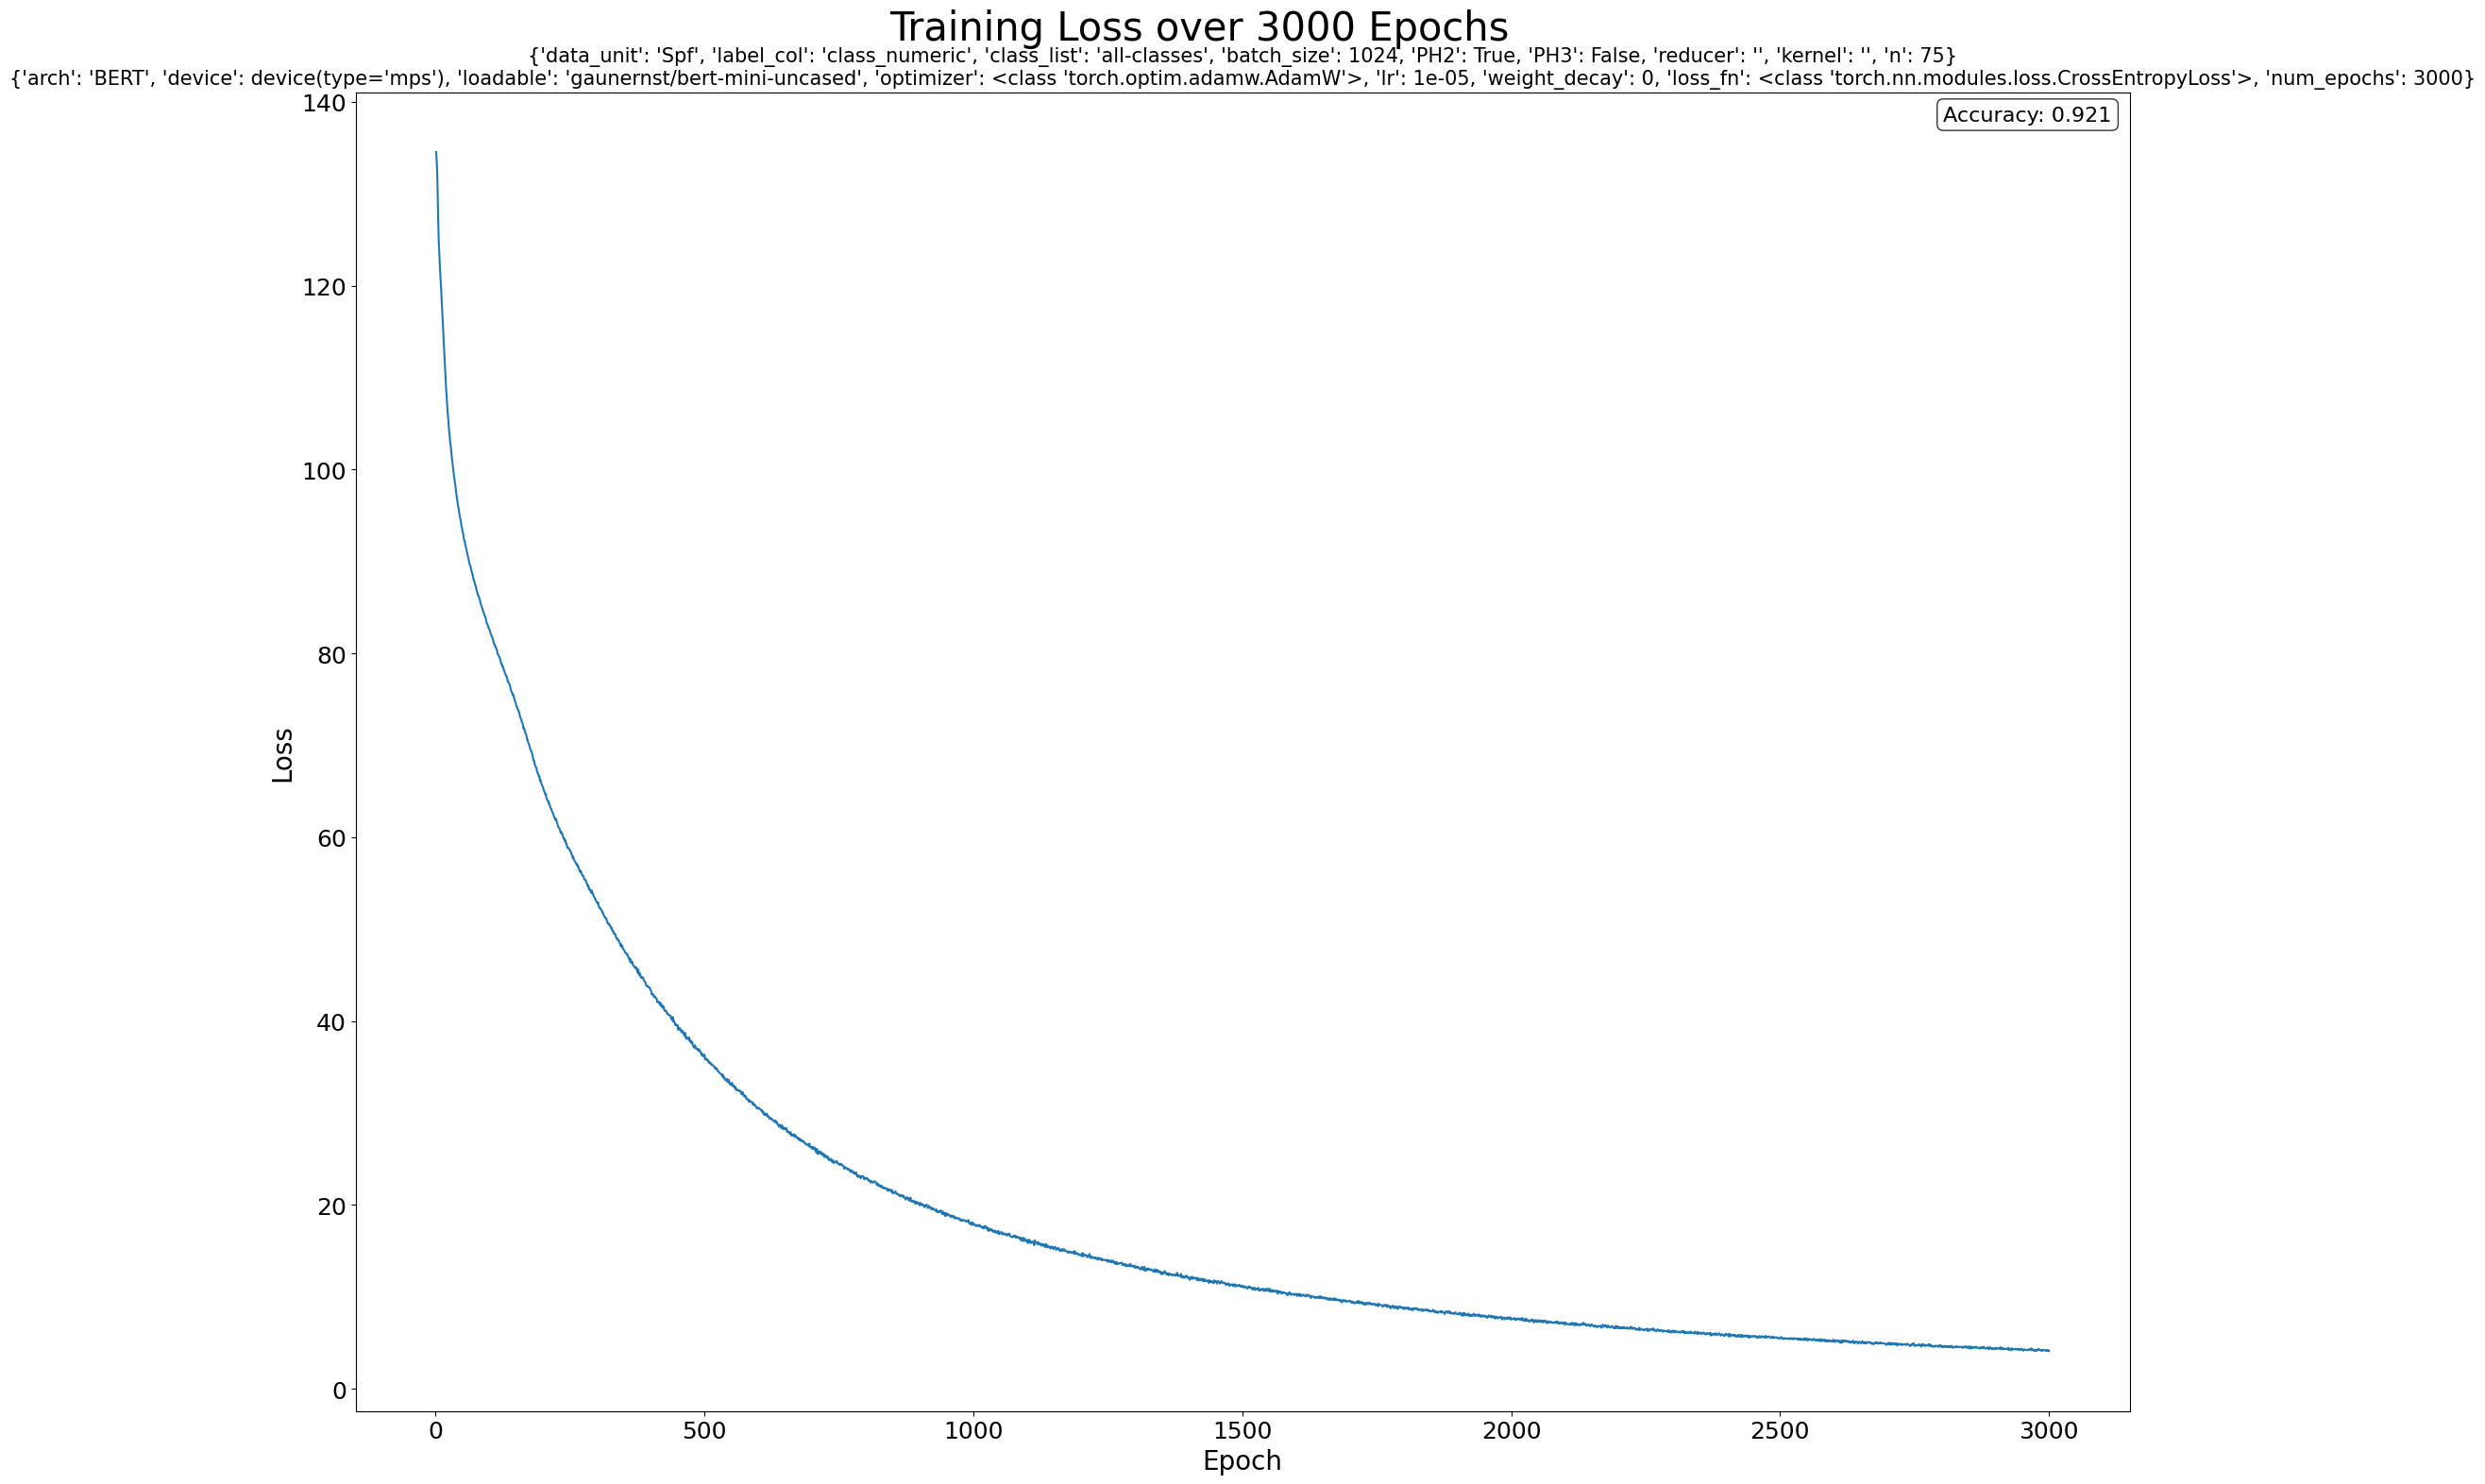

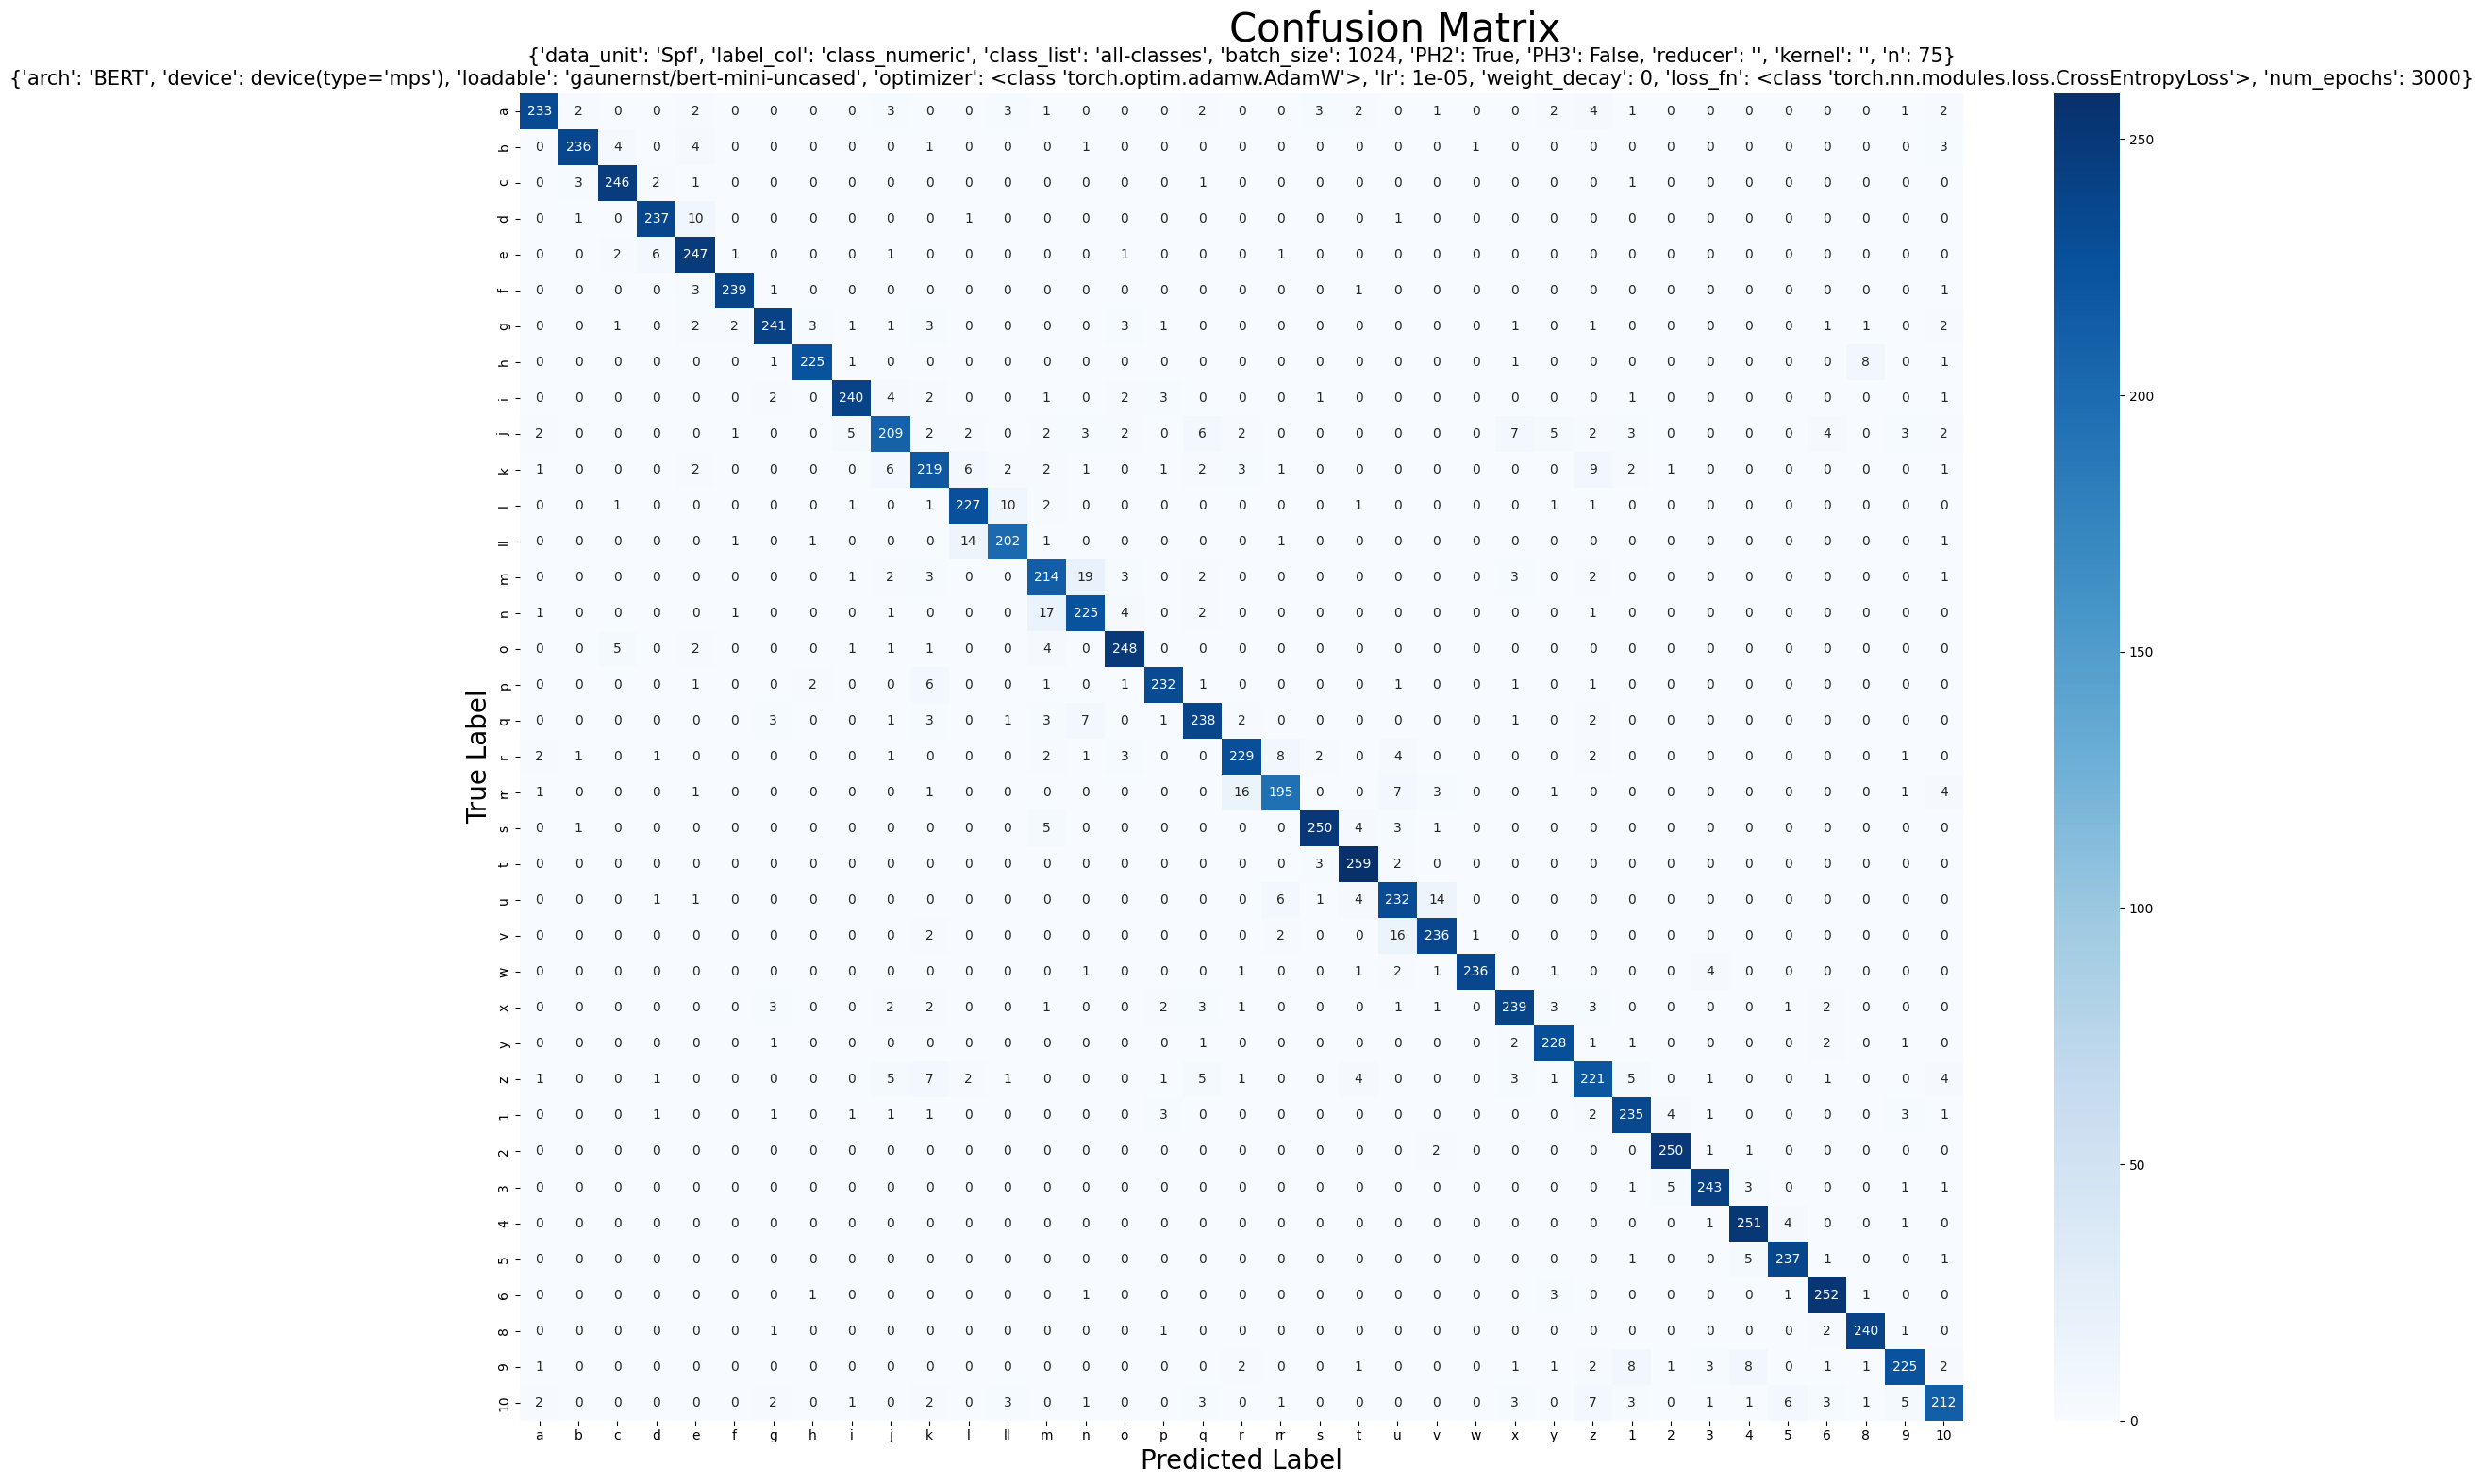

In [ ]:
print(model.accuracy)
print(model.top2accuracy)
print(model.macro_f1)
print(model.macro_precision)
print(model.macro_recall)

model.show_loss()
model.show_confusion_matrix()

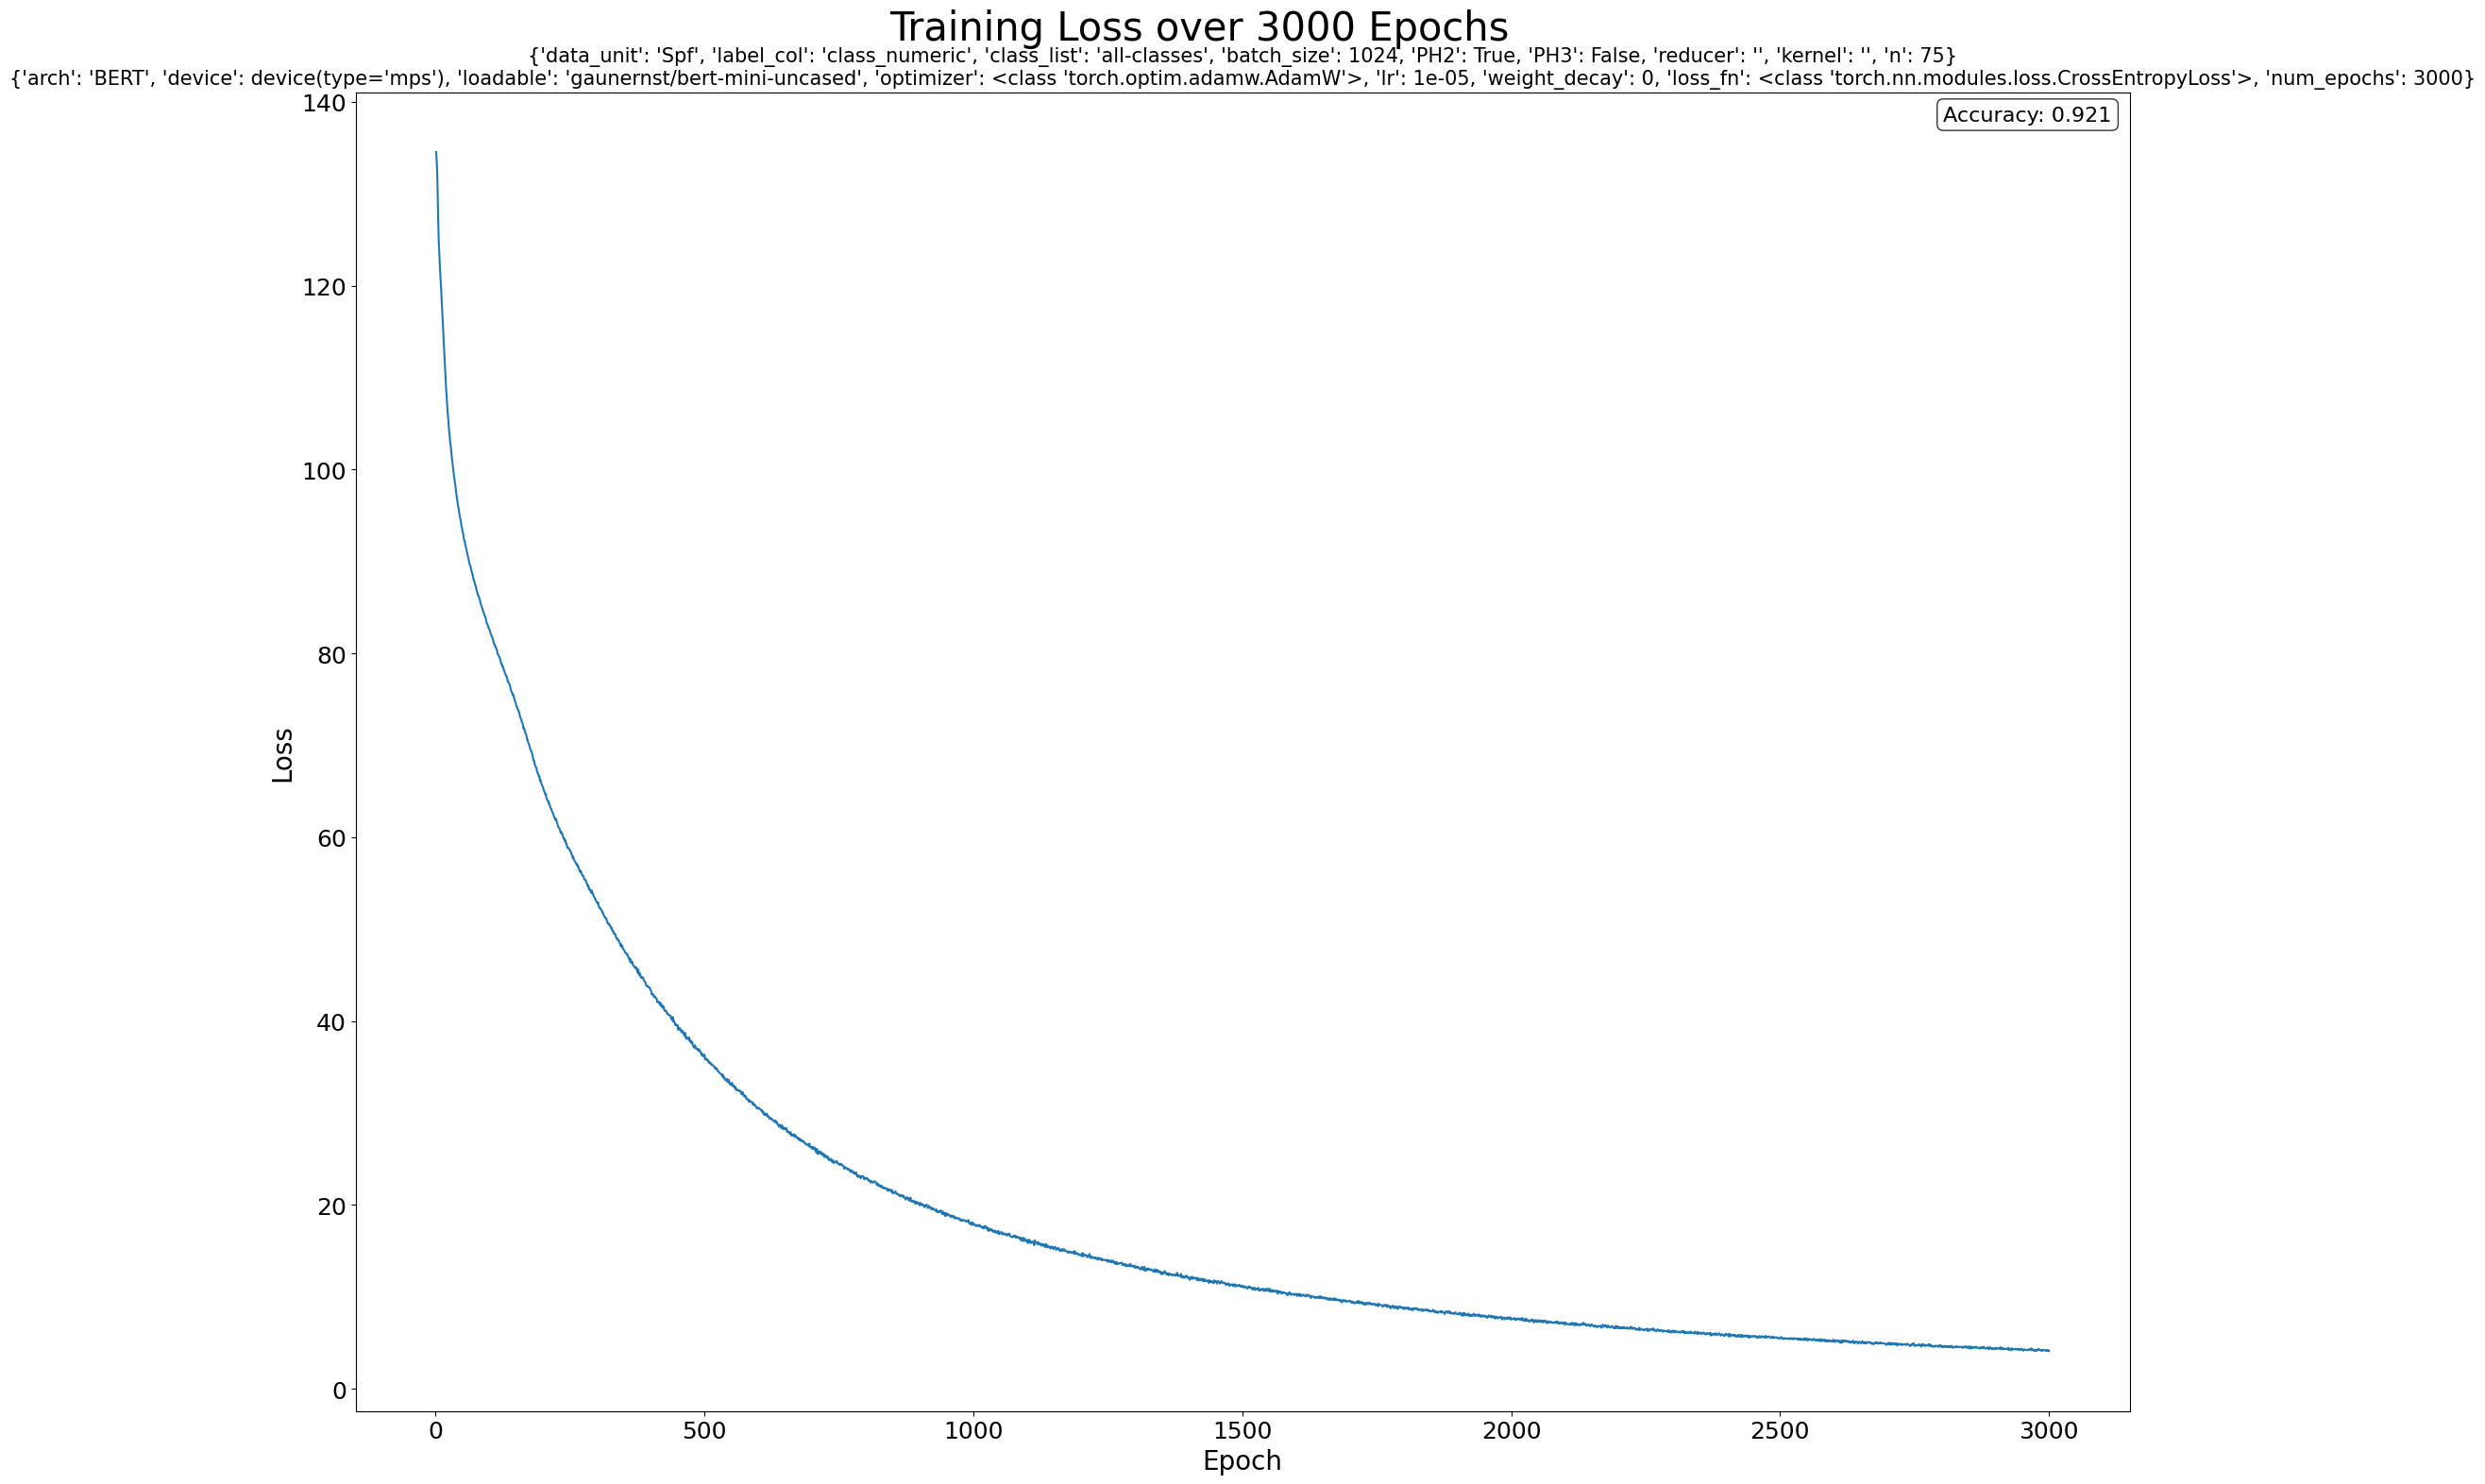

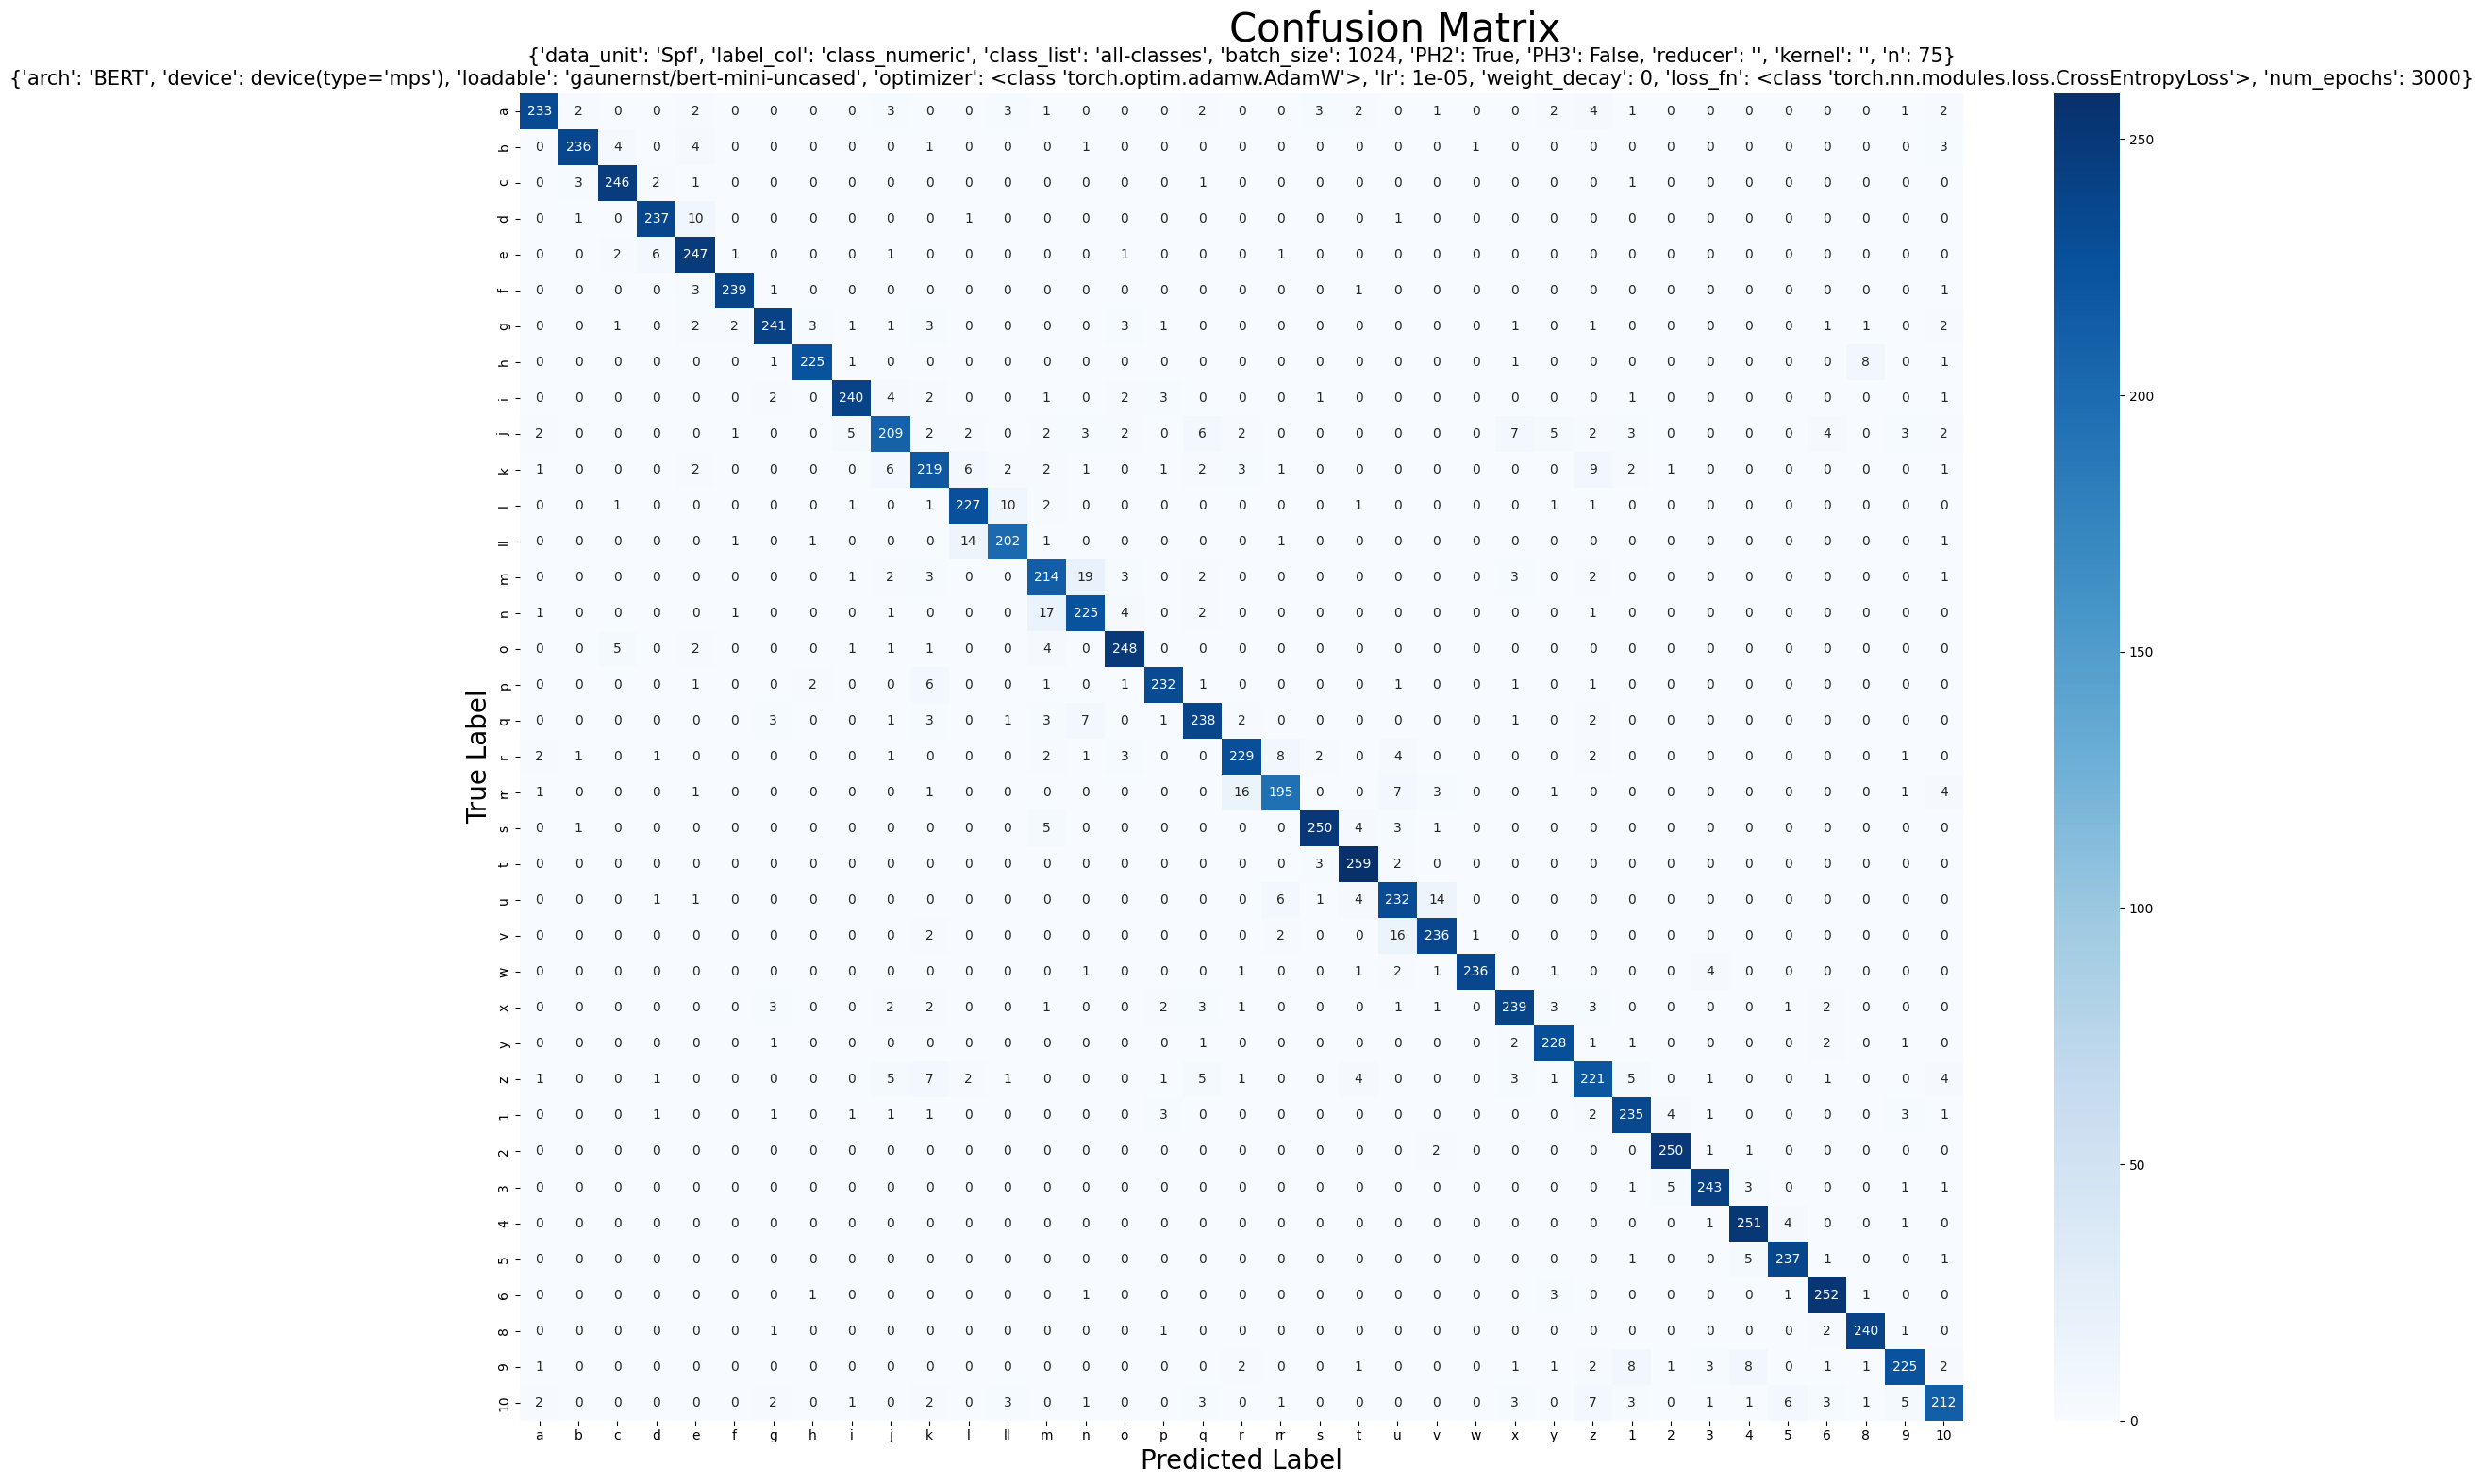

In [ ]:
model.keep()
#bert.clean_bert()